In [1]:
from coders import Feature16QAM as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[22784] Lock acquired: 5


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=3*gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 937/813/445
Gen average time: 0:00:08.737766
Gen 2 grades: 1057/846/484
Gen average time: 0:00:08.036867
Gen 3 grades: 1933/1358/745
Gen average time: 0:00:07.540760
Gen 4 grades: 2518/2105/1277
Gen average time: 0:00:07.185316
Gen 5 grades: 1809/1657/1095
Gen average time: 0:00:07.422343
Gen 6 grades: 2327/2187/1656
Gen average time: 0:00:06.985593
Gen 7 grades: 2861/2477/1942
Gen average time: 0:00:06.851010
Gen 8 grades: 2861/2437/1827
Gen average time: 0:00:06.733957
Gen 9 grades: 2618/2415/1890
Gen average time: 0:00:06.852656
Gen 10 grades: 3343/2661/2018
Gen average time: 0:00:06.497786
Gen 11 grades: 2785/2562/1976
Gen average time: 0:00:06.570255
Gen 12 grades: 2438/1956/1162
Gen average time: 0:00:07.031404
Gen 13 grades: 2698/2363/1503
Gen average time: 0:00:07.281373
Gen 14 grades: 2664/2447/1720
Gen average time: 0:00:07.422465
Gen 15 grades: 2923/2365/1924
Gen average time: 0:00:07.562427
Gen 16 grades: 2539/2339/1741
Gen average time: 0:00:07.651283
Gen 17 

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/Feature16QAM_GA_2305744320104.pdf


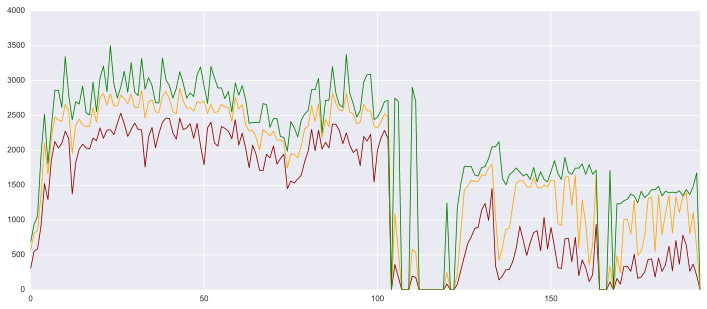

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

Feature16QAM:
    filter_std_base: 15
    peak_threshold: 0.2802370015028921
    filter_window_scale: 0.13838129907010557
    filter_shape: 0.5963195326883673
    symbol_levels: 4
    filter_std_scale: 0.11323304121323857
    frequency: 2010
    d_high_amplitude: 0.7332934084657717
    low_amplitude: 0.3458716976179534
    symbol_shifts: 4
    peak_width_span: 0.3004587986389206
    filter_type: 1
    amplitude: 0.6508173686595309
    sqe_start_v: 0.6891095519262272
    filter_window_base: 18
    d_low_amplitude: 0.4905740957304444
    d_comparison_type: 0
    rate: 96000
    sqe_end: 0.09247547211833848
    sqe_start: 0.36583000915259745
    peak_width_start: 0.06625442407135723
    symbol_duration: 0.0021519876804620324
    d_symbol_shifts_scale: 4
    high_amplitude: 0.3647017954559295
    symbol_width: 4
    sqe_end_v: 0.7173619267547998
Feature16QAM:
    filter_std_base: 13
    peak_threshold: 0.2802370015028921
    filter_window_scale: 0.22062151697954802
    filter_shape: 0.5227

In [7]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0, 3000)(c, raw=True))
    print(c)

1855.072463768116 0.7323333333333333
Feature16QAM:
    filter_std_base: 15
    peak_threshold: 0.2802370015028921
    filter_window_scale: 0.13838129907010557
    filter_shape: 0.5963195326883673
    symbol_levels: 4
    filter_std_scale: 0.11323304121323857
    frequency: 2010
    d_high_amplitude: 0.7332934084657717
    low_amplitude: 0.3458716976179534
    symbol_shifts: 4
    peak_width_span: 0.3004587986389206
    filter_type: 1
    amplitude: 0.6508173686595309
    sqe_start_v: 0.6891095519262272
    filter_window_base: 18
    d_low_amplitude: 0.4905740957304444
    d_comparison_type: 0
    rate: 96000
    sqe_end: 0.09247547211833848
    sqe_start: 0.36583000915259745
    peak_width_start: 0.06625442407135723
    symbol_duration: 0.0021519876804620324
    d_symbol_shifts_scale: 4
    high_amplitude: 0.3647017954559295
    symbol_width: 4
    sqe_end_v: 0.7173619267547998
1438.2022471910113 0.9686666666666667
Feature16QAM:
    filter_std_base: 13
    peak_threshold: 0.28023700150